<div class="alert alert-block alert-info" style='text-align:center'>
    Experiment begins here
</div>

### Notebook structure
1. [Packages used](#Import-packages)
2. [Some utilities](#Some-utilities)
3. [Dataset management](#Dataset)
4. [Modeling](#Modeling)
5. [Training pipeline](#Training-pipeline)
6. [Prediction time](#Prediction-time)

### Import packages

In [1]:
import sys
sys.path.append('../scripts')


In [2]:
from dataset import DataSet, DataModule
from model import Model
from utils import ramp_scheduler
from config import Config

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import torch as th

import pytorch_lightning as pl
from pytorch_lightning import seed_everything, Trainer

from sklearn.utils.class_weight import compute_class_weight

from tqdm.notebook import tqdm

In [3]:
for _ in tqdm(range(2000000), file=sys.stdout):
    pass

  0%|          | 0/2000000 [00:00<?, ?it/s]

### Some utilities

In [4]:
_ = seed_everything(Config.seed_value)

Global seed set to 2021


In [5]:
epochs = [x for x in range(100)]
lrs = [ramp_scheduler(epoch = x) for x in epochs]

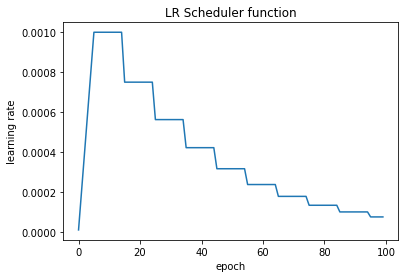

In [6]:
plt.title('LR Scheduler function')
plt.plot(epochs, lrs)
plt.xlabel('epoch')
plt.ylabel('learning rate')

plt.show()

<div class="alert alert-block alert-info" style='text-align:center' id="Dataset">
   Dataset
</div>

In [7]:
train_df = pd.read_csv(os.path.join(Config.data_dir, 'Train_10_folds.csv'))
train_df.head()

,ID,text,label,fold
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1,7
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1,9
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1,7
3,U0TTYY8,ak slouma,1,6
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1,4


<div class="alert alert-block alert-info" style='text-align:center' id="Modeling">
   Modeling
</div>

In [8]:
%%time

# compute class weights
class_w = compute_class_weight(
    class_weight='balanced', 
    classes=train_df.label.unique(), 
    y=train_df.label.values
)

# define model
model = Model(
    class_w=class_w
)

print(model)

Downloading:   0%|          | 0.00/542M [00:00<?, ?B/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

<div class="alert alert-block alert-info" style='text-align:center' id="Training-pipeline">
   Training pipeline
</div>

<div class="alert alert-block alert-info" style='text-align:center' id="Training-job">
   Training job
</div>

<div class="alert alert-block alert-info" style='text-align:center' id="Prediction-time">
   Prediction time
</div>